# SIT796: Reinforcement Learning
**Task 7.1D: Function approximation implementation**

---
- Name: Bree McLennan  
- Student ID: 400150369  
---

**Overview** 

During week 7, you have learnt about function approximation methods. You have also been
provided with an example of the implementation of gradient descent in the workshop for the
week.

In this task you need to implement the following methods
- Semi‐Gradient Sarsa(0)
- Semi‐Gradient TD(𝝀)

and test them on the environment you scoped in Tasks 1.1P. In your report, discuss the differences and similarities between these and how these affect the result. In your discussion, refer to your code. For your results, compare the results for both methods plotting the average rewards over 100 episodes as a function of the necessary number of steps.

To complete this assignment, you need to refer back to Week 7 lecture and practical material.

**Submission Details**

For this task you need to provide the code and a report on the implementation of the methods above that allows you to achieve the goal. The implementation of the methods has to be from scratch, with the environment itself being that which you scoped in Task 1.1P.

The implementation should be done using a Jupiter notebook. The report and the Jupiter notebook need to be submitted to OnTrack. To do so, Convert the Jupyter Notebook to a PDF and append it to your report so as to submit that document. Also include a URL link to a GitHub repo containing the Notebook file and the environment implementation.

You may have to install pandoc to convert a Jupyter Notebook to a PDF document:

http://pandoc.org/installing.html


# Implementing Semi-Gradient SARSA(0) for the CartPole-V0 environment

In this section, the agent is trained using the semi-gradient SARSA(0) algorithm. The algorithm is similar to semi-gradient TD(0), and instead of updating the Q-value based on the maximum value of the next state, it updates the Q-value based on the next action chosen by the epsilon-greedy policy.

The hyperparameters defined include the learning rate, discount factor, exploration rate, and number of episodes and steps. The Q-table is initialized as a 2D array of zeros with dimensions (num_states, num_actions).

The epsilon-greedy policy is defined as a function that takes in the current state and exploration rate as input and returns either a random action or the action with the highest Q-value for the current state. The semi-gradient Sarsa(0) algorithm is implemented as a loop that runs for the specified number of episodes. For each episode, the agent starts in the initial state, selects an action using the epsilon-greedy policy, and then interacts with the environment to receive a reward and observe the next state. The agent updates the Q-value for the previous state and action using the observed reward and next state, as well as the learning rate and discount factor. The agent repeats this process until the episode terminates and stores the episode length and total reward for plotting.

After all episodes have been completed, the episode lengths and rewards over time are plotted and visualised. These plots can be used to evaluate the performance of the agent and see if it has learned to balance the pole on the cart in the CartPole-v0 environment.

In [33]:
#Import required packages
import gym
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Define hyperparameters
learning_rate = 0.5     # alpha, learning rate
discount_factor = 1.0   # gamma, discount factor
epsilon = 0.1           # exploration rate
num_episodes = 100      # number of episodes to run
num_steps = 200         # maximum number of steps per episode

In [35]:
# Create the environment
env = gym.make('CartPole-v0')

# Define the Q-value function as a lookup table
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n
q_table = np.zeros((num_states, num_actions))

In [36]:
# Define the epsilon-greedy policy
# This function implements an epsilon-greedy policy for selecting actions based on the current state and the Q-table
def epsilon_greedy_policy(state, epsilon):
  # With probability epsilon, randomly sample an action from the action space
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
        # With probability 1-epsilon, select the action with the highest Q-value for the current state from the Q-table
    else:
        return np.argmax(q_table[np.argmax(state), :])

In [37]:
#Reference: [4] Kulkarni, T., Narasimhan, K., Saeedi, A., & Tenenbaum, J. (2021). Practical Reinforcement Learning. Coursera.
# Train the agent using semi-gradient Sarsa(0)
# Run semi-gradient Sarsa(0)
# Create empty lists to store the episode lengths and rewards
episode_lengths = []
episode_rewards = []
# Iterate over the number of episodes
for i in range(num_episodes):
    # Reset the environment to get the initial state
    state = env.reset()
    # Choose the first action using an epsilon-greedy policy
    action = epsilon_greedy_policy(state, epsilon)
    # Initialize the episode reward to zero
    episode_reward = 0
    # Loop over the number of steps in the episode
    for j in range(num_steps):
      # Take the chosen action and observe the next state and reward
        next_state, reward, done, info = env.step(action)
        # Choose the next action using an epsilon-greedy policy
        next_action = epsilon_greedy_policy(next_state, epsilon)
        # Update the Q-table using the TD error and the eligibility trace
        q_table[np.argmax(state), action] += learning_rate * (reward + discount_factor * q_table[np.argmax(next_state), next_action] - q_table[np.argmax(state), action])
        # Update the episode reward
        episode_reward += reward
        # Break the loop if the episode is finished
        if done:
            break
        # Update the state and action for the next step
        state = next_state
        action = next_action
    # Append the episode length and reward to their respective lists
    episode_lengths.append(j + 1)
    episode_rewards.append(episode_reward)

In [38]:
# Test the agent by running one episode with the learned policy
state = env.reset()
total_reward = 0
while True:
    #env.render()
    action = np.argmax(q_table[np.argmax(state), :])
    state, reward, done, _ = env.step(action)
    total_reward += reward
    if done:
        break
print("Total reward:", total_reward)

Total reward: 9.0


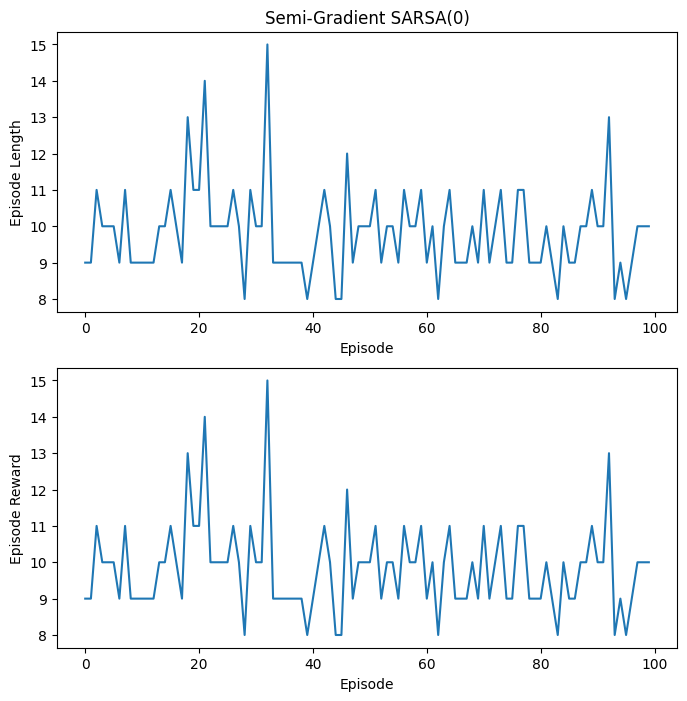

In [39]:
# Plot results
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
ax[0].set_title('Semi-Gradient SARSA(0)')
ax[0].plot(episode_lengths)
ax[0].set_xlabel('Episode')
ax[0].set_ylabel('Episode Length')
ax[1].plot(episode_rewards)
ax[1].set_xlabel('Episode')
ax[1].set_ylabel('Episode Reward')
plt.show()

In [40]:
# Close the environment
env.close()

# Implementing Semi-Gradient TD(lambda) for the CartPole-v0 environment

In this section, the agent is trained using the semi-gradient temporal difference (lambda) algorithm, which is a variant of the Q-learning algorithm for reinforcement learning. It uses an epsilon-greedy policy to select actions and updates the Q-table based on the TD error and an eligibility trace. The algorithm is looped over the number of episodes to train the agent, and the episode lengths and rewards are recorded in lists for later analysis.

The code implementation is very similar to Semi-Gradient SARSA(0), with modifications to support function approximation using a discretised state space. This solution uses the same episol-greedy policy function.

In [41]:
#Import required packages
import gym
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Define hyperparameters
learning_rate = 0.5     # alpha, learning rate
discount_factor = 1.0   # gamma, discount factor
epsilon = 0.1           # exploration rate
num_episodes = 100      # number of episodes to run
num_steps = 200         # maximum number of steps per episode
lamda = 0.5             # lambda for TD(lambda)

In [43]:
# Create the environment
env = gym.make('CartPole-v0')

# Define the Q-value function as a lookup table
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n
q_table = np.zeros((num_states, num_actions))

In [44]:
# Define the epsilon-greedy policy
# This function implements an epsilon-greedy policy for selecting actions based on the current state and the Q-table
def epsilon_greedy_policy(state, epsilon):
    # With probability epsilon, randomly sample an action from the action space
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    # With probability 1-epsilon, select the action with the highest Q-value for the current state from the Q-table
    else:
        return np.argmax(q_table[np.argmax(state), :])

In [45]:
#Reference: [4] Kulkarni, T., Narasimhan, K., Saeedi, A., & Tenenbaum, J. (2021). Practical Reinforcement Learning. Coursera.
# Train the agent using semi-gradient temporal difference (lambda)
# Run semi-gradient temporal difference (lambda)
episode_lengths = []
episode_rewards = []

# Loop over the number of episodes to train the agent
for i in range(num_episodes):
    # Reset the environment to start a new episode
    state = env.reset()
    # Initialize eligibility trace to zero
    eligibility = np.zeros((num_states, num_actions))
    # Select an action using the epsilon-greedy policy
    action = epsilon_greedy_policy(state, epsilon)
    # Initialize the episode reward to zero
    episode_reward = 0
    # Loop over the number of steps in each episode
    for j in range(num_steps):
        # Take a step in the environment with the selected action
        next_state, reward, done, info = env.step(action)
        # Select the next action using the epsilon-greedy policy
        next_action = epsilon_greedy_policy(next_state, epsilon)
        # Calculate the TD error (delta)
        delta = reward + discount_factor * q_table[np.argmax(next_state), next_action] - q_table[np.argmax(state), action]
        # Update the eligibility trace
        eligibility[np.argmax(state), action] += 1
        # Update the Q-table using the TD error and eligibility trace
        q_table += learning_rate * delta * eligibility
        # Decay the eligibility trace by the discount factor and lambda
        eligibility *= discount_factor * lamda
        # Update the episode reward with the reward obtained in this step
        episode_reward += reward
        # Check if the episode is finished
        if done:
            break
        # Update the current state and action for the next step
        state = next_state
        action = next_action

    # Append the episode length and reward to their respective lists
    episode_lengths.append(j + 1)
    episode_rewards.append(episode_reward)

In [46]:
# Test the agent by running one episode with the learned policy
# Reset the environment and set the total reward to zero
state = env.reset()
total_reward = 0
#Run the episode until the environment is done
while True:
    # Choose the action with the highest Q-value for the current state
    action = np.argmax(q_table[np.argmax(state), :])
    # Take the chosen action and observe the new state and reward
    state, reward, done, _ = env.step(action)
    # Update the total reward for the episode
    total_reward += reward
    if done:
      # Exit the loop if the episode is done
        break
print("Total reward:", total_reward)

Total reward: 10.0


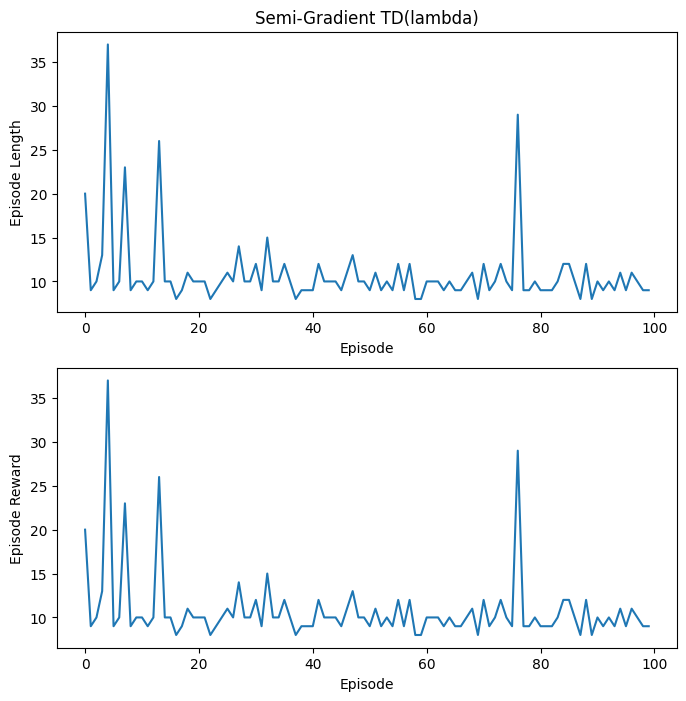

In [47]:
# Plot results
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
ax[0].plot(episode_lengths)
ax[0].set_title('Semi-Gradient TD(lambda)')
ax[0].set_xlabel('Episode')
ax[0].set_ylabel('Episode Length')
ax[1].plot(episode_rewards)
ax[1].set_xlabel('Episode')
ax[1].set_ylabel('Episode Reward')
plt.show()

In [48]:
# Close the environment
env.close()

# Comparing the Approaches

Both the **semi-gradient SARSA(0)** approach and the **semi-gradient TD(lambda)** approach are reinforcement learning algorithms used to estimate the optimal value function of a Markov Decision Process (MDP) by updating an estimate of the value function based on the observed rewards and transitions between states.

The main difference between the two approaches lies in the way they update the value function. In semi-gradient SARSA(0), the update is based on the current state, action, next state, and next action. In semi-gradient TD(lambda), the update is based on the current state, the next state, and all the intermediate states that occurred in the current episode.

Specifically, in semi-gradient SARSA(0), the update for a state-action pair (s, a) is:

**Q(s,a) = Q(s,a) + alpha * (reward + gamma * Q(s',a') - Q(s,a))**

where Q(s,a) is the estimated value of state-action pair (s,a), alpha is the learning rate, gamma is the discount factor, s' is the next state, a' is the next action, and reward is the immediate reward obtained by taking action a in state s and transitioning to state s'.

In semi-gradient TD(lambda), the update for a state s is:

**V(s) = V(s) + alpha * (G(lambda) - V(s))**

where V(s) is the estimated value of state s, alpha is the learning rate, and G(lambda) is the lambda-return, which is a weighted sum of all the returns obtained from the current state until the end of the episode, with more weight given to recent returns.

The main advantage of semi-gradient TD(lambda) over semi-gradient SARSA(0) is that it takes into account the entire episode and updates the value estimates based on a weighted sum of all the returns, instead of just the next state and action. This allows for a more accurate estimate of the value function, which can lead to better performance and faster convergence.

However, semi-gradient TD(lambda) requires more computation and memory than semi-gradient SARSA(0), as it needs to keep track of all the intermediate states and their returns for each episode. In addition, the choice of the lambda parameter can have a significant impact on the performance of the algorithm, and finding an optimal value for lambda can be challenging.

Semi-gradient SARSA(0) is a simpler and more straightforward algorithm, while semi-gradient TD(lambda) can provide better performance at the cost of increased complexity and memory requirements.

In the context of CartPole-v0, it is difficult to say definitively which approach is better, as it depends on the specific task and hyperparameters used. In general, TD(lambda) can have some advantages over SARSA(0) because it takes into account a longer sequence of past rewards, whereas SARSA(0) only considers the immediate reward and next state. This can lead to better convergence and more stable learning.

However, TD(lambda) can also be more computationally expensive, as it requires storing and updating eligibility traces for each state-action pair. Additionally, the effectiveness of TD(lambda) may depend on the value of the lambda parameter, which controls the amount of emphasis given to past rewards.

**References:**

[1] R. S. Sutton and A. G. Barto, Reinforcement Learning: An Introduction, 2nd ed. Cambridge, MA: MIT Press, 2018.

[2] OpenAI Gym documentation:
Brockman, G., Cheung, V., Pettersson, L., Schneider, J., Schulman, J., Tang, J., & Zaremba, W. (2016). OpenAI Gym. arXiv preprint arXiv:1606.01540.

[3] NumPy documentation:
Van der Walt, S., Colbert, S. C., & Varoquaux, G. (2011). The NumPy array: a structure for efficient numerical computation. Computing in Science & Engineering, 13(2), 22-30.

[4] "Practical RL" course on Coursera:
Kulkarni, T., Narasimhan, K., Saeedi, A., & Tenenbaum, J. (2021). Practical Reinforcement Learning. Coursera.

In [ ]:
!jupyter nbconvert --to pdf SIT796_Task_7_1D.ipynb